In [1]:
##Kerasa MNIST veri setini yüklüyoruz.
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#Makine Öğrenmesinde kategori, sınıflandırma problemlerinde sınıf olarak adlandırılır. Her bir veriye örnek denir.
#Belirli bir örneğin ait olduğu sınıf etiket-label olarak adlandırılır.

11493376/11490434 [==============================] - 400s 35us/step

In [2]:
##Ağ Mimarisi
from keras import layers
from keras import  models
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
#Derin ağların temel yapı taşı, veri için filtre olarak düşünülebilecek veri işleme modülü olan KATMANLAR'dır.
#Dense - Fully Connected: Önceki katman ile kendi katmanındaki tüm birimlerin birbirine tamamen bağlı olduğu katmandır.
#İkinci katman, 10 adet çıktı birimi bulunan ve 10 elemanlı olasılık puanlarını gösteren (toplamları 1) bir diziyi geriye döndürür.

In [3]:
#Kayıp Fonksiyonu - Loos Function: Ağımızın eğitim veri seti üzerinde kendi performansını gözlemlemesi ve böylece kendi kendine doğru yolu bulabilmesi için.
#Eniyileme - Optimization: Ağımızın girdisi olan veri ile oluşturduğu kaybı göz önünde bulundurarak kendisini güncelleme mekanizması.
#Eğitim ve test süresince takip edilecek metrikler: Burada biz sadece doğruluğa (doğru sınıflandırılan görüntülerin toplam görüntü sayısına oranı) odaklanacağız.

In [4]:
##Derleme Adımı
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#Eğitime başlamadan önce, tüm girdilerimdeki değerleri [0,1] aralığına ölçeklendiriyoruz.



In [5]:
##Girdilerin Hazırlanması
#Bu aşamadan önce eğitim veri setimizdeki görüntüler (60000,28,28) şeklinde bir dizide ve her elemanı "uint8" veri tipinde [0,255] veri aralığında saklanmıştı.
#Eğitim veri setindeki görüntüleri (60000,28,28) "float32" veri tipinde 0 ile 1 arasında olacak şekilde düzenliyoruz.
train_images = train_images.reshape((60000,28 * 28))
train_images = train_images.astype('float32') / 255 #Buradaki bölme işlemi 0-255 arasındaki değerli 0-1 arasında indirmek için.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
##Etiketlerin Hazırlanması
#Kategorik olarak etikeliyoruz.
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [7]:
#Model Fit etmek (uydurmak)
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.4255 - accuracy: 0.8768

In [8]:
#Ağımızı test veri seti üzerinde deniyoruz.
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)
#Eğitim ve test veri seti arasındaki doğruluk oranı aralarındaki fark Aşırı Uydurmanın (overfitting) örneğidir.

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9750

In [9]:
#Train_image'mizin eksen sayısını yani "ndim"i görüntüleyelim.
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim,train_images.shape,train_images.dtype)
#Sonuç olarak, 8 Bitlik tam sayılar taşıyan 3B tensörümüz var.
#Daha net konuşursak, 28x28 boyutundaki matrislerden 60000 adet bulunduran bir dizimiz var.
#Her matris 0 ile 255 arasında bir değer alan gri ölçeğinde (grey scale) bir görüntüdür.(Bunu veri setinden biliyoryz.

3 (60000, 28, 28) uint8


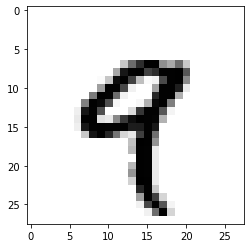

In [10]:
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [11]:
#Numpy ile Tensörler üzerinde işlemler#
#Bu örnek sayesinde 10 ile 100 (100 dahil değil) arasındaki örnekleri seçiyoruz. Bunlarıda bir dizi halinde kaydediyoruz.
my_slice = train_images[10:100]
print(my_slice.shape)
#Daha detay bir notasyon ile aynı örneği gösterelim
my_slice = train_images[10:100, : , : ] #Önceki ile aynı sonucu verir çünkü eksenleri seçmedik.
my_slice = train_images[10:100, 0:28, 0:28]#Önceki ile aynı sonucu verir çünkü bütün eksen boyunca seçim yaptık.
#Sağ alt köşeden 14x14'lük bir kısmı seçmek için:
my_slice = train_images[ : , 14: , 14: ]
#Ortadan 14x14'lük bir kısmı seçmek için:
my_slice = train_images[ : , 7:-7, 7:-7]

(90, 28, 28)


In [12]:
#Veri Yığını Notasyonu#
#Veri taşıyan tensörlerin genellikle birinci ekseni "örnek ekseni"dir. MNIST örneğimizde, örneklerimiz rakamların görüntüleridir.
#Derin öğrenme modelleri tüm verileri bir kere de kullanmak yerine, küçük yığınlara-Batch ayırır.
batch = train_images[:128]# Büyüklüğü 128 olan bir yığın.
batch = train_images[128:256]# Bir sonraki yığın....
# n'inci yığını gösterebilmek içinse:
n=0 #n sıfırdan başladığını varsayıyoruz.
batch = train_images[n*128: (n+1)*128]


In [13]:
#Veri Tensörleri için Gerçek Dünya Örnekleri#
#Vektör Verisi: 2B Tensörler (örnekler, öznitelikler)
#Zaman Serisi verisi ya da ardaşık veri: 3B Tensörler (örnekler, zaman_adımı, öznitelikler)
#Görüntüler: 4B Tensörler (örnekler, yükseklik, genişlik, kanallar)
#Video: 5B Tensörler (örnekler, kareler, yükseklik, genişlik, kanllar)

##Vektör Verisi
#Birinci eksen "Örnek Ekseni" ikinci eksen "Öznitelik Ekseni"dir.
#Gerçek Hayat Örneği;
#Sigorta istatistikleri veri setimizde her kişi için yaş, posta kodu, ve aylık gelir bilgileri olsun.
#Her kişi için üç değerli bir vektör olursa 100000 kişi için tüm veri seti (100000, 3) olur.

##Zaman Verisi ya da Ardaşık Veri
#Ne zaman veri setinde zaman ( ya da ardaşıklık durumu) işin içine girerse verileri bir ekseni zaman olacak şekilde 3B tensörlerde saklamak gerekir.
#Zaman ekseni olarak ikinci eksen( eksenler sıfırdan başlar yani eksen 1) olarak kullanımı yaygındır.
#Örnek olarak Hisse senedi veri seti:
#Her dakika bir hisse senedinin anlık en düşük fiyatını ve en yüksek fiyatını saklayacağız.
#Dolayısıyla her dakika 3B bir vektör olacağından tüm günün verisi (390, 3) şeklinde bir 2B tensör ve 250 günlük veri ise (250,390,3) şeklinde bir 3B tensör olacaktır.
#Burada her örnek bir günün tüm verisini oluşturacaktır.
#Bir diğer Örnek ise;
#Her bir 128 farklı karakterden birisi olan 280 karakterlik bir dizi olacak şeklinde tweet verisi olsun.
#Bu durumda her karekter 128 elemanlı bir ikilik-binary vektör olacaktır.(Tüm elemanlar sıfır, sadece ilgili karakterin indeksi 1 olacak.)
#Sonra her tweet (280, 128) şeklinde bir 2B tensör olacağından 1 milyon tweet bulunan veri setimiz (1000000, 280, 128) şeklinde bir tensör olacaktır.

## Görüntü Verisi
#Görüntülerin tipik olarak 3 boyutu vardır: Yükseklik, genişlik ve kanal sayısı.
#256x256 boyutunda 128 gri ölçekli ( gri ölçekte görüntülerin sadece 1 kanalı mevcuttur.) örnekler için yığın (128, 256, 256, 1) şeklinde olur.
#3 renk derinliği olan bir görüntü içinse (128, 256, 256, 3) şeklinde tensörler olacaktır.
#Tensorflow renk derinliği eksenini en sonda kullanır. (örnekler, yükseklük, genişlik, kanallar)

## Video Verisi
#Video (5B Tensörler), her biri renkli ardaşık kareler olarak düşünülebilir. (örnek, kare, yükseklik, genişlik, kanllar)
#Örneğin 60 saniyelik, 144x256 boyutunda bir Youtube videosu saniyede 4 kare ile örneklenmiş olsun (toplam 240 kare).
#Böyle 4 video bulunan bir yığın  (4, 240, 144, 256, 3) şeklinde bir tensör olacaktır.
#Toplamda 106168320 değer. Eğer veri tipi float32 olursa bu tensörün büyüklüğü 405mb olacaktır.
#Gerçek hayatta kullandığımız videolar daha küçüktür çünkü, veri tipi float32 değildir ve yüksek oranda sıkıştırılırlar.

In [14]:
##Tensör İşlemleri
# AND, OR, NOR vb. işlemlerin tensör verileri üzerinde uygulanması gibidir. Tensör toplamı, çarpımı vb.
import keras
keras.layers.Dense(512, activation='relu')
#Bu katmanı 2 boyutlu bir girdiyi iki boyutlu bir girdiye dönüştüren bir fonksiyon olarak düşünebiliri.
#Böylece fonksiyon W: 2B bir tensör, b: bir vektör olmak üzere;
output = relu(dot(W, input) + b)
#Burada 3 tensör işlemi bulunmaktadır.
# 1- Girdi verileri ile W'nun iç çarpımıdır.(dot)
# 2- İç çarpımın sonucu ile b vektörünün toplanmasıdır.
# 3- relu(max(x,0)) işlemidir.

NameError: name 'relu' is not defined

In [ ]:
#Eleman Bazlı İşlemler
# relu ve toplama işlemi eleman bazlı-element wise işlemlerdir. Bu işlemler tensörün her elemanına ayrı ayrı uygulanırlar.
#Bu da eleman bazlı işlemleri paralel programlamaya uygun hale getirirler.
#Python'da naif bir şekilde elemaz bazlı işlemleri yapmak için relu'da olduğu gibi for döngüsü ile yapabiliriz;
def naive_relu(x):
    assert len(x.shape) == 2 #x, 2B Numpy Tensörüdür.
    x = x.copy() # Giren tensörün üzerine yazmamak için.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x
#Toplama işlemi için:
def naive_add(x, y):
    assert len(x.shape) == 2 # x ve y 2B bir Numpy Tensörü
    assert x.shape == y.shape
    x = x.copy() # Giren tensörün üzerine yazmamak için.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += x[i,j]
    return x
# Aynı işlemlerin Numpy ile yapımı:
z = x + y # Eleman bazlı toplama
z = np.maximum(z,0.) # Eleman bazlı relu


In [ ]:
#Yayma Operasyonu
#Bir önceki naive_Add naif uygulamamız sadece aynı şekle sahip ve 2B tensörleri destekliyor.
#Daha önce Dense katmanında 2B bir tensör ile bir vektörü topladık. O zaman iki farklı şekle sahip tensör söz konusu olduğunda şöyle yapılır;
#Mümkün olduğunda ve anlam farklılığı olmadığında küçük tensör büyük tensörün şekline yayılır-broadcast. Yayma iki aşamada gerçekleşir:
# 1- Küçük tensöre eksenler (yayma ekseni olarak adlandırılır) eklenerek büyük tensörün ndim ile eşit hale getirilir.
# 2- Küçük tensör yeni eksen üzerinde tekrarlanarak büyük tensörün şekli ile aynı şekle getirilir.
#(32,10) şeklinde bir X tensörü ve (10, ) şeklinde bir y düşünelim. Önce y'ye bir boş eksen ekleyelim ve böylece y (1,10) şeklinde olsun.
#Bu yeni eksende y'yi 32 defa tekrar edersek (32,10) şeklinde bir Y elde ederiz.
#Her i range(0,32) olmak üzere Y[i,:]==y olacaktır. Artık X ve Y aynı şekle gelmiş oldular.
#Bu tekrarlama işlemi tamamen sanal olarak yapıldı:Hafıza seviyesi yerine algoritmik olarak yapıldı.
#Çünkü vektürü yeni eksen üzerinde 10 kez tekrar etmek oldukça akılcı bir işlemdir.
def naive_add_matrix_and_vector(x,y):
    assert
